Problem 1:

Build a Predictive Model to determine who will be making more than $50K a year using their demographic and financial information available on the data




Import the package

In [0]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import precision_recall_fscore_support, roc_curve, auc

Step 1:　Data PreProcessing


1-1 Impord the data file

In [0]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)
test_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', skiprows = 1, header = None)
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 
                'occupation','relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week',
                 'native_country', 'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

Mark the column as Training set and display the record

In [0]:
train_set["isTrain"] = 1

In [4]:
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class,isTrain
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,1


Mark the test set as 0 (not training data ) and display the record

In [0]:
test_set["isTrain"] = 0

In [39]:
test_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class,isTrain
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.,0
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.,0
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.,0


Combine the training and test set so that you can do data  manupulation at a time

In [0]:
comb_data= pd.concat([train_set,test_set])

1-2 Understanding the data

In [41]:
print('comb_data shape:', comb_data.shape)
print('comb_data size:', comb_data.size)
print('comb_data.ndim:', comb_data.ndim, '\n')
print('comb_data.index:', comb_data.index)
print('comb_data.columns:', comb_data.columns)

comb_data shape: (48842, 16)
comb_data size: 781472
comb_data.ndim: 2 

comb_data.index: Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            16271, 16272, 16273, 16274, 16275, 16276, 16277, 16278, 16279,
            16280],
           dtype='int64', length=48842)
comb_data.columns: Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'wage_class', 'isTrain'],
      dtype='object')


Describe the integer column data

In [42]:

comb_data.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,isTrain
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382,0.666660
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444,0.471412
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000,1.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000,1.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


Get the data type of all the columns

In [43]:
comb_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 16280
Data columns (total 16 columns):
age               48842 non-null int64
workclass         48842 non-null object
fnlwgt            48842 non-null int64
education         48842 non-null object
education_num     48842 non-null int64
marital_status    48842 non-null object
occupation        48842 non-null object
relationship      48842 non-null object
race              48842 non-null object
sex               48842 non-null object
capital_gain      48842 non-null int64
capital_loss      48842 non-null int64
hours_per_week    48842 non-null int64
native_country    48842 non-null object
wage_class        48842 non-null object
isTrain           48842 non-null int64
dtypes: int64(7), object(9)
memory usage: 6.3+ MB


In [44]:
comb_data.describe(include=['O'])

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,wage_class
count,48842,48842,48842,48842,48842,48842,48842,48842,48842
unique,9,16,7,15,6,5,2,42,4
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,24720


Fill the NA/NAN column with unknown and replace the ? with unknown

In [0]:
comb_data.fillna("unknown",inplace=True)
comb_data=comb_data.replace({' ?':"unknown"})

Check for the wage type and combine them

In [46]:
comb_data.wage_class.unique()

array([' <=50K', ' >50K', ' <=50K.', ' >50K.'], dtype=object)

In [0]:
comb_data=comb_data.replace({' <=50K':0," >50K":1,' <=50K.':0," >50K.":1})

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Understanding every feature

workclass

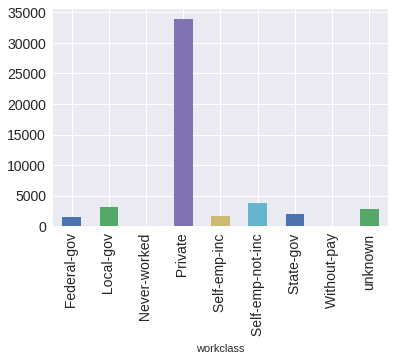

In [49]:
comb_data.groupby(["workclass"]).size().plot(kind="bar",fontsize=14)

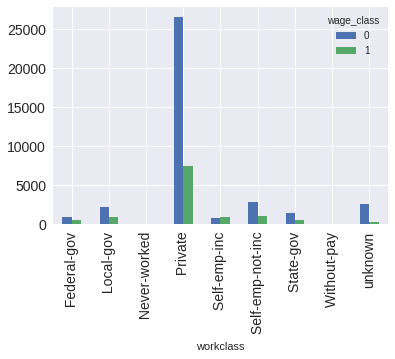

In [50]:
comb_data.groupby(["wage_class","workclass"]).size().unstack("wage_class").plot(kind="bar",fontsize=14)

Education

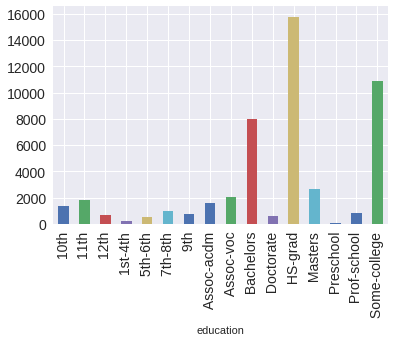

In [51]:
comb_data.groupby(["education"]).size().plot(kind="bar",fontsize=14)

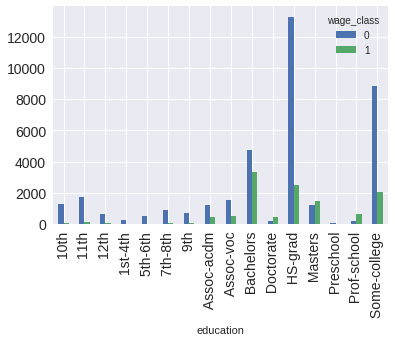

In [52]:
comb_data.groupby(["wage_class","education"]).size().unstack("wage_class").plot(kind="bar",fontsize=14)

Marital Status

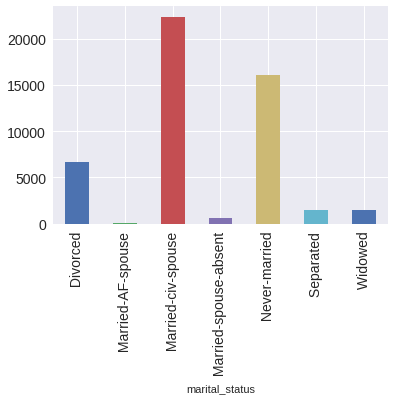

In [53]:
comb_data.groupby(["marital_status"]).size().plot(kind="bar",fontsize=14)

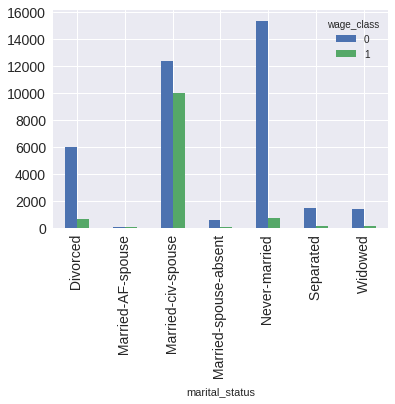

In [54]:
comb_data.groupby(["wage_class","marital_status"]).size().unstack("wage_class").plot(kind="bar",fontsize=14)

Occupation

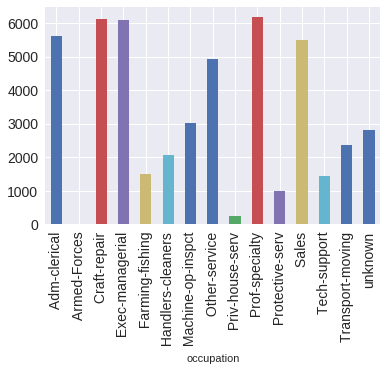

In [55]:
comb_data.groupby(["occupation"]).size().plot(kind="bar",fontsize=14,x=comb_data.groupby(["occupation"]).size(),y=comb_data[["occupation"]])

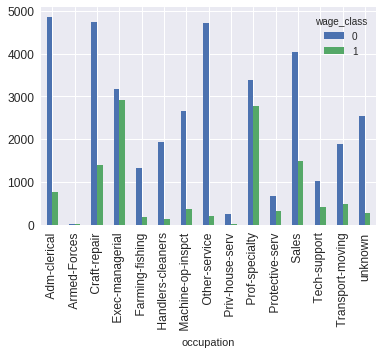

In [56]:
comb_data.groupby(["wage_class","occupation"]).size().unstack("wage_class").plot(kind="bar",fontsize=12)

Relationship

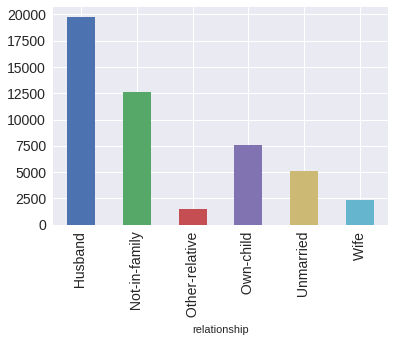

In [57]:
comb_data.groupby(["relationship"]).size().plot(kind="bar",fontsize=14)

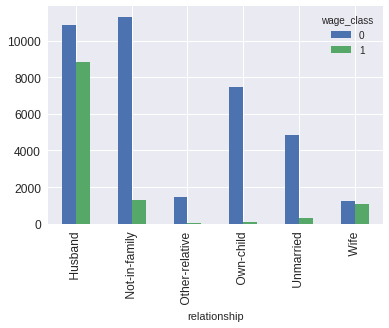

In [58]:
comb_data.groupby(["wage_class","relationship"]).size().unstack("wage_class").plot(kind="bar",fontsize=12)

Race

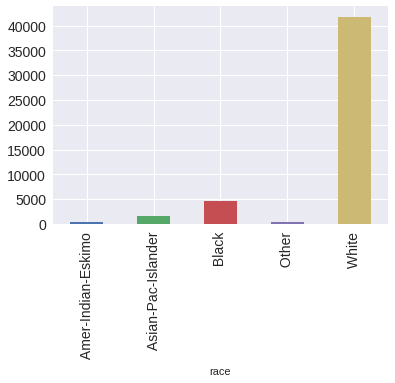

In [59]:
comb_data.groupby(["race"]).size().plot(kind="bar",fontsize=14)

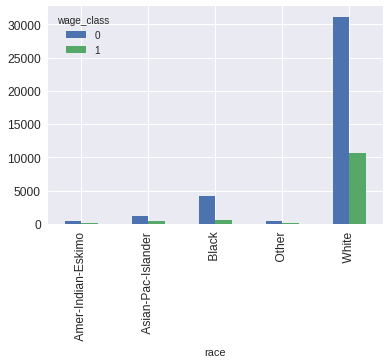

In [60]:
comb_data.groupby(["wage_class","race"]).size().unstack("wage_class").plot(kind="bar",fontsize=12)

Native Country

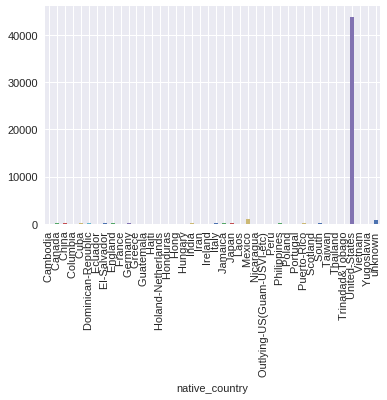

In [61]:
comb_data.groupby(["native_country"]).size().plot(kind="bar",fontsize=11)

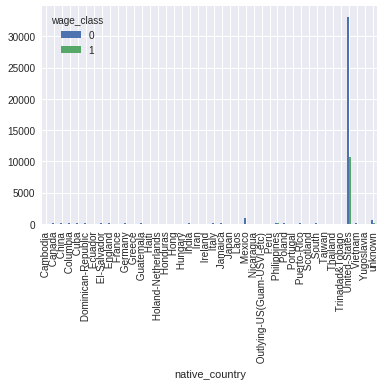

In [62]:
comb_data.groupby(["wage_class","native_country"]).size().unstack("wage_class").plot(kind="bar")

Sex

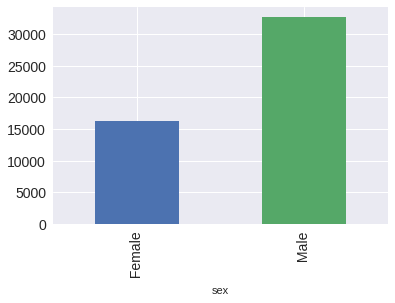

In [63]:
comb_data.groupby(["sex"]).size().plot(kind="bar",fontsize=14)

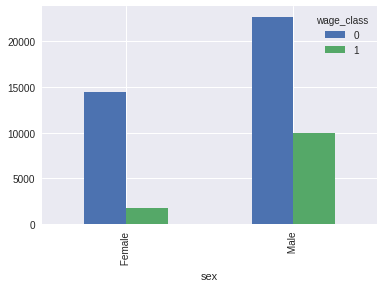

In [64]:
comb_data.groupby(["wage_class","sex"]).size().unstack("wage_class").plot(kind="bar")

Get the mean of all the numeric column with respect to wages/income

In [65]:
comb_data.pivot_table(comb_data, index=['wage_class'], aggfunc=np.mean)

,age,capital_gain,capital_loss,education_num,fnlwgt,hours_per_week,isTrain
wage_class,,,,,,,
0,36.872184,147.010308,54.151931,9.598493,190039.565523,38.840048,0.665321
1,44.275178,4042.239497,193.528964,11.602807,188470.574570,45.452896,0.670916


1-2 Drop the useless feature
delete fnlwgt feature which is useless for predicting the income whether excees 50k

In [0]:
#drops column:fnlwgt
comb_data=comb_data.drop(columns='fnlwgt')

1-4 Encoding Categorical Data

Categorical variables: [workclass:1,education:2, marital-status:4, occupation:5, relationship:6, race:7, sex:8, native-country:12]

In [0]:
data1=pd.get_dummies(data=comb_data,columns=["workclass","education","marital_status","occupation","relationship","race","sex","native_country"])

In [38]:
data1.head()

,age,education_num,capital_gain,capital_loss,hours_per_week,wage_class,isTrain,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,native_country_unknown
0,39,13,2174,0,40,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,13,0,0,13,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,9,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,53,7,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,28,13,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Segregate the training and test set 

In [68]:
train_set = data1[data1["isTrain"]==1]
test_set =  data1[data1["isTrain"]==0]

train_set.drop("isTrain",axis=1,inplace=True)
test_set.drop("isTrain",axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Segregate the dependent variable of both test and training set

In [69]:
target=pd.DataFrame(train_set["wage_class"])
train_set.drop("wage_class",axis=1,inplace=True)

output=pd.DataFrame(test_set["wage_class"])
test_set.drop("wage_class",axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Give a proper name to Training and test set

In [0]:
X_train = train_set
y_train = target
X_test  = test_set
y_test  = output

Problem 1:
Prediction task is to determine whether a person makes over 50K a year.


Algorithm 1:- Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets, model_selection, tree, preprocessing, metrics, linear_model

In [0]:

lm=LogisticRegression()

In [73]:
# Fit the model
model = lm.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
# Predict the model for test data
test_pred = model.predict(X_test)

In [0]:
# get the probability of test data
probs = model.predict_proba(X_test)

In [0]:
# Get the accuracy
acc = round(model.score(X_test, y_test) * 100, 2) 

In [77]:
# Go the cross validation with 10 fold
train_pred = model_selection.cross_val_predict(lm, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=10, 
                                                  n_jobs = -1)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
# Get the percentage of cv 10 fold
acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)

In [50]:
print("Accuracy: %s" % acc)
print("Accuracy CV 10-Fold: %s" % acc_cv)

Accuracy: 85.15
Accuracy CV 10-Fold: 85.11


In [79]:
# Print the classification report for training data
print (metrics.classification_report(y_train, train_pred))

             precision    recall  f1-score   support

          0       0.88      0.93      0.90     24720
          1       0.74      0.59      0.66      7841

avg / total       0.84      0.85      0.85     32561



In [80]:
# Print the classification report for test data
print (metrics.classification_report(y_test, test_pred))

             precision    recall  f1-score   support

          0       0.88      0.93      0.91     12435
          1       0.73      0.59      0.65      3846

avg / total       0.84      0.85      0.85     16281



Algorithm 2:-Decision Tree

In [0]:
# Import the Decison tree 
from sklearn.tree import DecisionTreeClassifier

In [0]:
# make  a copy of Decision tree
clf = DecisionTreeClassifier(random_state=1,max_leaf_nodes=32)

In [0]:
# Fit the training set

model = clf.fit(X_train, y_train)

In [0]:
# Do the prediction of test set
test_pred = model.predict(X_test)

In [0]:
# Calculate the probability
probs = model.predict_proba(X_test)

In [0]:
# Calculate the accuracy
acc = round(model.score(X_test, y_test) * 100, 2) 

In [0]:
# Do the cross validation with 10 fold
train_pred = model_selection.cross_val_predict(clf, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=10, 
                                               n_jobs = -1)

In [0]:
# Accuracy after the cross validation
acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)

In [89]:
# Print the accuracy
print("Accuracy: %s" % acc)
print("Accuracy CV 10-Fold: %s" % acc_cv)

Accuracy: 86.09
Accuracy CV 10-Fold: 85.67


In [90]:
# Print the classification report for training data
print (metrics.classification_report(y_train, train_pred))

             precision    recall  f1-score   support

          0       0.87      0.95      0.91     24720
          1       0.79      0.56      0.65      7841

avg / total       0.85      0.86      0.85     32561



In [91]:
# Print the classification report for test data
print (metrics.classification_report(y_test, test_pred))

             precision    recall  f1-score   support

          0       0.87      0.95      0.91     12435
          1       0.79      0.56      0.65      3846

avg / total       0.86      0.86      0.85     16281



Algorithm 3:-Random Forest Classifier

In [0]:
# Import Ramndom Forest
from sklearn.ensemble import RandomForestClassifier

In [0]:
# make  a copy of Random Forest
rfc = RandomForestClassifier(n_estimators=10, 
                             min_samples_leaf=2,
                             min_samples_split=17, 
                             criterion='gini', 
                             max_features=15)

In [94]:
# Fit the training set
model= rfc.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [0]:
# Do the prediction of test set
test_pred = model.predict(X_test)

In [0]:
# Calculate the probability
probs = model.predict_proba(X_test)

In [0]:
# Calculate the accuracy
acc = round(model.score(X_test, y_test) * 100, 2) 

In [98]:
# Do the cross validation with 10 fold
train_pred = model_selection.cross_val_predict(rfc, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=10, 
                                               n_jobs = -1)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:753: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:753: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:753: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:753: DataConversionWarning: A column-vector y was passed when a 

In [0]:
# Accuracy after the cross validation
acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)

In [101]:
# Print the accuracy
print("Accuracy: %s" % acc)
print("Accuracy CV 10-Fold: %s" % acc_cv)

Accuracy: 85.99
Accuracy CV 10-Fold: 86.23


In [102]:
# Print the classification report for training data
print (metrics.classification_report(y_train, train_pred))

             precision    recall  f1-score   support

          0       0.89      0.94      0.91     24720
          1       0.76      0.63      0.69      7841

avg / total       0.86      0.86      0.86     32561



In [103]:
# Print the classification report for test data
print (metrics.classification_report(y_test, test_pred))

             precision    recall  f1-score   support

          0       0.89      0.93      0.91     12435
          1       0.74      0.62      0.68      3846

avg / total       0.85      0.86      0.86     16281



Algorithm 4:-K nearnest Neighbour (KNN)

In [0]:
# Import k-Nearest Neighbors from sklearn
from sklearn.neighbors import KNeighborsClassifier

In [0]:
# Create an object
neigh = KNeighborsClassifier(n_neighbors=3)

In [106]:
# Fit the training set
model = neigh.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


In [0]:
# Do the prediction of test set
test_pred = model.predict(X_test)

In [0]:
# Calculate the probability
probs = model.predict_proba(X_test)

In [0]:
# Calculate the accuracy
acc = round(model.score(X_test, y_test) * 100, 2) 

In [110]:
# Do the cross validation with 10 fold
train_pred = model_selection.cross_val_predict(neigh, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=10, 
                                               n_jobs = -1)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:753: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:753: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


In [0]:
# Accuracy after the cross validation
acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)

In [112]:
# Print the accuracy
print("Accuracy: %s" % acc)
print("Accuracy CV 10-Fold: %s" % acc_cv)

Accuracy: 83.85
Accuracy CV 10-Fold: 84.01


In [113]:
# Print the classification report for training data
print (metrics.classification_report(y_train, train_pred))

             precision    recall  f1-score   support

          0       0.89      0.90      0.90     24720
          1       0.67      0.65      0.66      7841

avg / total       0.84      0.84      0.84     32561



In [114]:
# Print the classification report for test data
print (metrics.classification_report(y_test, test_pred))

             precision    recall  f1-score   support

          0       0.89      0.90      0.89     12435
          1       0.66      0.64      0.65      3846

avg / total       0.84      0.84      0.84     16281



Algorithm 5:-Gaussian Naive Bayes

In [0]:
# Import GaussianNB rom sklearn
from sklearn.naive_bayes import GaussianNB

In [0]:
# Create an object
gnb = GaussianNB()

In [117]:
# Fit the training set
model= gnb.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
# Do the prediction of test set
test_pred = model.predict(X_test)

In [0]:
# Calculate the probability
probs = model.predict_proba(X_test)

In [0]:
# Calculate the accuracy
acc = round(model.score(X_test, y_test) * 100, 2) 

In [121]:
# Do the cross validation with 10 fold
train_pred = model_selection.cross_val_predict(gnb, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=10, 
                                               n_jobs = -1)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
# Accuracy after the cross validation
acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)

In [123]:
# Print the accuracy
print("Accuracy: %s" % acc)
print("Accuracy CV 10-Fold: %s" % acc_cv)

Accuracy: 80.28
Accuracy CV 10-Fold: 80.11


In [124]:
# Print the classification report for training data
print (metrics.classification_report(y_train, train_pred))

             precision    recall  f1-score   support

          0       0.93      0.80      0.86     24720
          1       0.56      0.82      0.66      7841

avg / total       0.84      0.80      0.81     32561



In [125]:
# Print the classification report for test data
print (metrics.classification_report(y_test, test_pred))

             precision    recall  f1-score   support

          0       0.94      0.80      0.86     12435
          1       0.56      0.82      0.66      3846

avg / total       0.85      0.80      0.81     16281



Boosting

In [0]:
import pandas as pd
import xgboost as xgb

In [0]:
xgbc = xgb.XGBClassifier()

In [128]:
model = xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=1).fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [129]:
# Do the prediction of test set
test_pred = model.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [0]:
# Calculate the probability
probs = model.predict_proba(X_test)

In [131]:
# Calculate the accuracy
acc = round(model.score(X_test, y_test) * 100, 2) 

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [132]:
# Do the cross validation with 10 fold
train_pred = model_selection.cross_val_predict(xgbc, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=10, 
                                               n_jobs = -1)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for ex

In [0]:
# Accuracy after the cross validation
acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)

In [134]:
# Print the accuracy
print("Accuracy: %s" % acc)
print("Accuracy CV 10-Fold: %s" % acc_cv)

Accuracy: 86.65
Accuracy CV 10-Fold: 86.35


In [135]:
# Print the classification report for training data
print (metrics.classification_report(y_train, train_pred))

             precision    recall  f1-score   support

          0       0.88      0.95      0.91     24720
          1       0.79      0.59      0.68      7841

avg / total       0.86      0.86      0.86     32561



In [136]:
# Print the classification report for test data
print (metrics.classification_report(y_test, test_pred))

             precision    recall  f1-score   support

          0       0.90      0.93      0.91     12435
          1       0.75      0.65      0.70      3846

avg / total       0.86      0.87      0.86     16281



Important factors- feature importance parameters

In [0]:
from matplotlib import pyplot


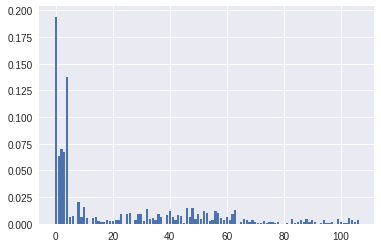

In [138]:
# plot

pyplot.bar(range(len(model.feature_importances_)),model.feature_importances_)

pyplot.show()

Problem 3:

Which algorithms are best for this dataset

XGBoost  algorithm give the best performance- 86.35